# Forecasting Hello World!

## Feng Li

### Guanghua School of Management
### Peking University

### [feng.li@gsm.pku.edu.cn](feng.li@gsm.pku.edu.cn)
### Course home page: [https://feng.li/forecasting-with-ai](https://feng.li/forecasting-with-ai)

## Let's forecast

- We will utilize an online AI forecasting platform Nixtla
- https://dashboard.nixtla.io

In [3]:
! pip install nixtla --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 11.6 MB/s eta 0:00:00
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/75/9b/f6336ce71f4e6ed32877309314f549192cd6b982ad6d96fd8b1b5a230870/utilsforecast-0.2.12-py3-none-any.whl (42 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 7.3 MB/s eta 0:00:00m eta 0:00:010:01:01


### Load the Nixtla API

In [3]:
from nixtla import NixtlaClient

nixtla_client = NixtlaClient(
    api_key='ASK-TA-FOR-API'
)

In [4]:
nixtla_client.validate_api_key()

INFO:nixtla.nixtla_client:Happy Forecasting! :)


True

In [5]:
import pandas as pd

df = pd.read_csv('../data/air_passengers_with_id.csv')
df.head()

,unique_id,ds,y
0,D1,1/1/1949,112
1,D1,2/1/1949,118
2,D1,3/1/1949,132
3,D1,4/1/1949,129
4,D1,5/1/1949,121


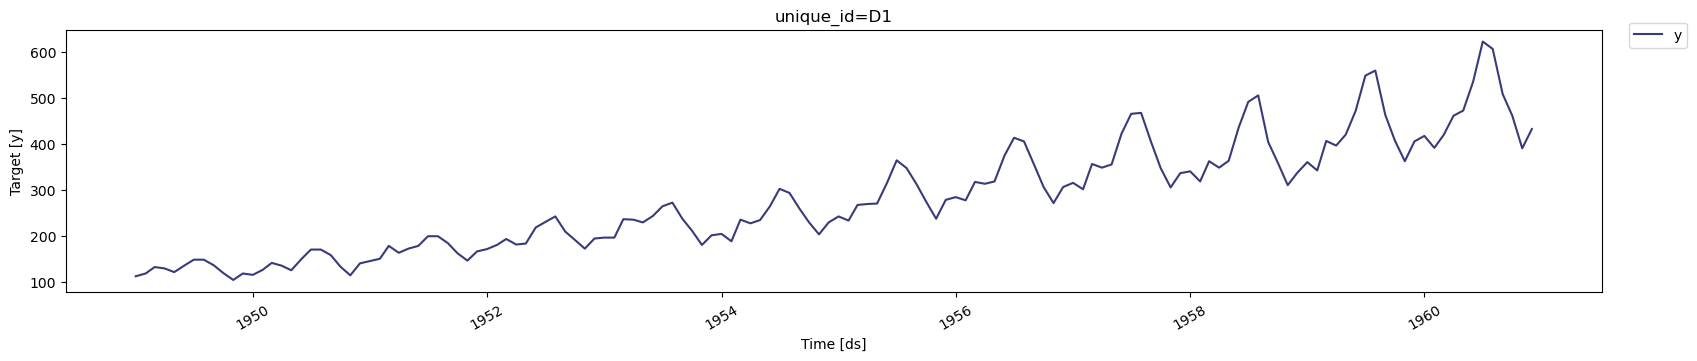

In [6]:
nixtla_client.plot(df, time_col='ds', target_col='y')

In [7]:
timegpt_fcst_df = nixtla_client.forecast(
    df=df,
    h=12,
    freq='MS',
    time_col='ds',
    target_col='y'
)
timegpt_fcst_df.head()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


,unique_id,ds,TimeGPT
0,D1,1961-01-01,437.83792
1,D1,1961-02-01,426.06270
2,D1,1961-03-01,463.11655
3,D1,1961-04-01,478.24450
4,D1,1961-05-01,505.64648


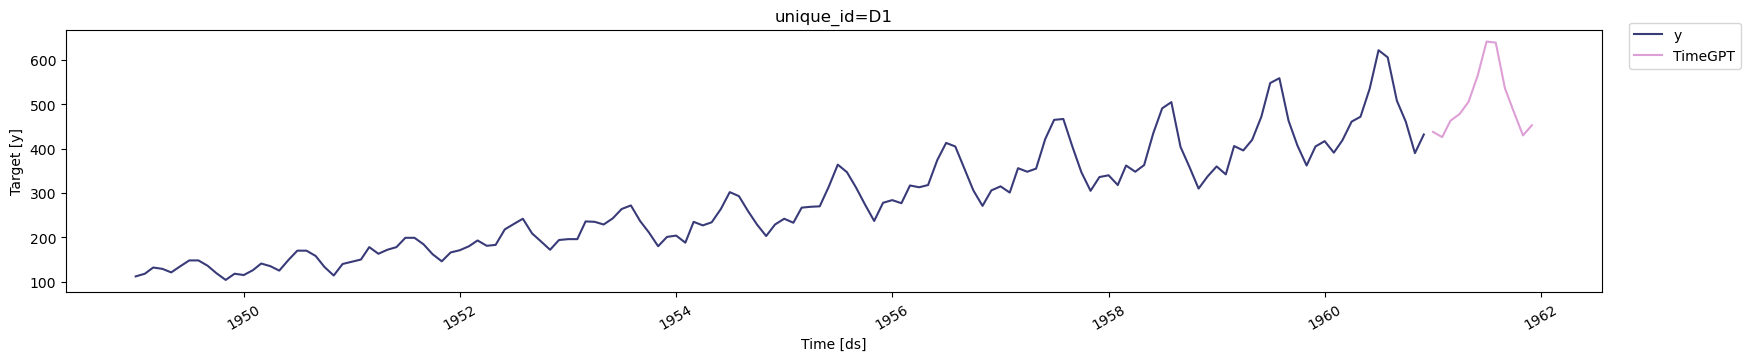

In [8]:
nixtla_client.plot(df, timegpt_fcst_df, time_col='ds', target_col='y')

In [9]:
timegpt_fcst_df = nixtla_client.forecast(
    df=df,
    h=36,
    freq='MS',
    time_col='ds',
    target_col='y',
    model='timegpt-1-long-horizon'
)
timegpt_fcst_df.head()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


,unique_id,ds,TimeGPT
0,D1,1961-01-01,436.84340
1,D1,1961-02-01,419.35153
2,D1,1961-03-01,458.94315
3,D1,1961-04-01,477.87607
4,D1,1961-05-01,505.65692


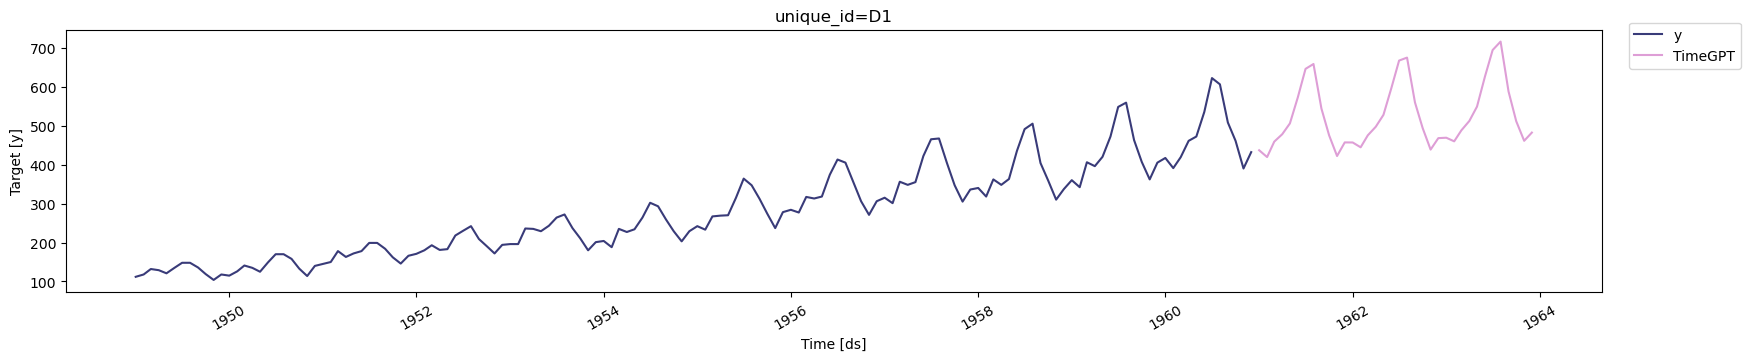

In [10]:
nixtla_client.plot(df, timegpt_fcst_df, time_col='ds', target_col='y')

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


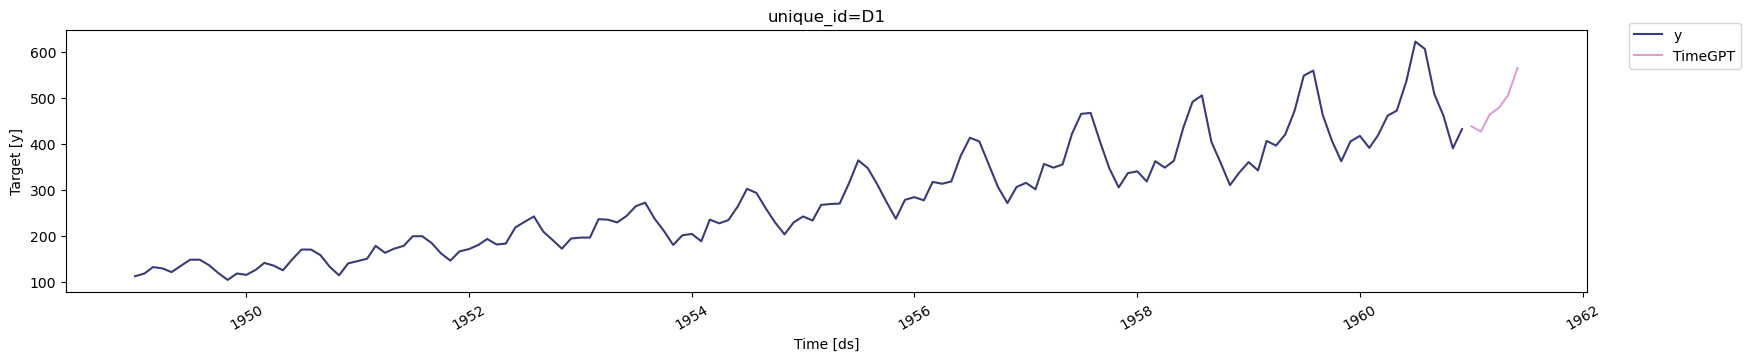

In [11]:
timegpt_fcst_df = nixtla_client.forecast(
    df=df,
    h=6,
    freq='MS',
    time_col='ds',
    target_col='y'
)
nixtla_client.plot(df, timegpt_fcst_df, time_col='ds', target_col='y')

## Calculates various features from time series data

- This part does not require an API.
- It is calculated via the `tsfeatures` package.

In [17]:
! pip install tsfeatures --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/09/05/14d9b2773fea75d87e9e55a85f531ed615538eddf18a4b3cad4e34e2f12d/arch-7.2.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (978 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/f3/1b/998312db6d361ded1dd56b457ada371a8d8d77ca2195a7d18fd8a1736f21/scikit_learn-1.7.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 5.7 MB/s eta 0:00:006.6 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/9a/2d/e518df036feab381c23a624dac47f8445ac55686ec7f11083655eb707da3/numba-0.61.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 9.7 MB/s eta 0:00:00
  Using cached h

In [13]:
from tsfeatures import tsfeatures

In [14]:
feat = tsfeatures(df, freq=1)
feat

,unique_id,hurst,series_length,unitroot_pp,unitroot_kpss,hw_alpha,hw_beta,hw_gamma,stability,nperiods,...,flat_spots,entropy,crossing_points,arch_lm,x_acf1,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10
0,D1,1.039864,144,-6.565597,2.739474,NaN,NaN,NaN,0.882625,0,...,18,0.428737,7,0.917195,0.948047,5.670087,0.302855,0.408838,-0.191006,0.25078


In [15]:
feat.T

,0
unique_id,D1
hurst,1.039864
series_length,144
unitroot_pp,-6.565597
unitroot_kpss,2.739474
hw_alpha,NaN
hw_beta,NaN
hw_gamma,NaN
stability,0.882625
nperiods,0


## Forecasting is easy and fun!